In [1]:
import keras
keras.__version__

C:\Users\Zach\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.2'

In [2]:
#https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
import os, shutil
base_dir = 'bats_and_nobats'

fileList = os.listdir()
type(fileList)
if base_dir in fileList:
    print("True")
else: 
    os.mkdir(base_dir)
    print("Created base_dir")

Created base_dir


In [3]:
#Move files around
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'
# The directory where we will
# store our smaller dataset
#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_bat_dir = os.path.join(train_dir, 'bat')
os.mkdir(train_bat_dir)

# Directory with our training dog pictures
train_no_bat_dir = os.path.join(train_dir, 'no_bat')
os.mkdir(train_no_bat_dir)

# Directory with our validation cat pictures
validation_bat_dir = os.path.join(validation_dir, 'bat')
os.mkdir(validation_bat_dir)

# Directory with our validation dog pictures
validation_no_bat_dir = os.path.join(validation_dir, 'no_bat')
os.mkdir(validation_no_bat_dir)

# Directory with our validation cat pictures
test_bat_dir = os.path.join(test_dir, 'bat')
os.mkdir(test_bat_dir)

# Directory with our validation dog pictures
test_no_bat_dir = os.path.join(test_dir, 'no_bat')
os.mkdir(test_no_bat_dir)

# Copy first 270 bat images to train_bat_dir
#fnames = ['bat.{}.jpg'.format(i) for i in range(1,270)]
fnames = ['bat.{}.jpg'.format(i) for i in range(1,10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bat_dir, fname)
    shutil.copyfile(src, dst)

# Copy next bat images to validation_bat_dir
#fnames = ['bat.{}.jpg'.format(i) for i in range(271, 406)]
fnames = ['bat.{}.jpg'.format(i) for i in range(11,20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next bat images to test_bat_dir
#fnames = ['bat.{}.jpg'.format(i) for i in range(407, 541)]
fnames = ['bat.{}.jpg'.format(i) for i in range(21, 30)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 803 no_bat images to train_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(1,803)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(1,10)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_no_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next no_bat images to validation_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(804, 1354)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(11, 20)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_no_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next no_bat images to test_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(1355, 1806)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(21, 30 )]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_no_bat_dir, fname)
    shutil.copyfile(src, dst)


FileNotFoundError: [Errno 2] No such file or directory: 'train\\bat.1.jpg'

In [0]:
#build network
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
#data preprocessing
batch_size = 1
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [0]:
#fit model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4425 - acc: 0.8400 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 2/30
100/100 [==============================] - 7s 68ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.4038e-05 - val_acc: 1.0000
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 3.5964e-06 - acc: 1.0000 - val_loss: 1.5014e-07 - val_acc: 1.0000
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 1.1557e-07 - acc: 1.0000 - val_loss: 1.0922e-07 - val_acc: 1.0000
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 1.0999e-07 - acc: 1.0000 - val_loss: 1.0999e-07 - val_acc: 1.0000
Epoch 6/30
100/100 [==============================] - 7s 68ms/step - loss: 1.0941e-07 - acc: 1.0000 - val_loss: 1.0922e-07 - val_acc: 1.0000
Epoch 7/30
100/100 [==============================] - 7s 67ms/step - loss: 1.0941e-07 - acc: 1.0000 - val_loss: 1.0999

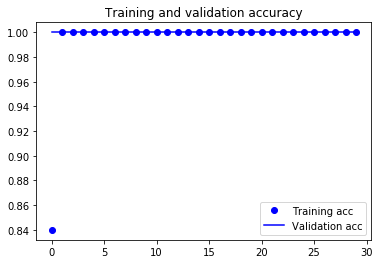

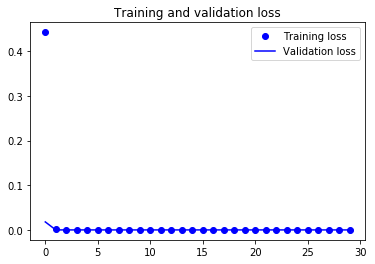

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [0]:
#plot accuracy
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
plt

In [0]:
#make predictions on training images of bats
#now try making predictions on train images
#Put one image into folder test1image
#images need to be in folder within folder test_dir to be found by flow_from_directory
#https://github.com/keras-team/keras/issues/3946
test_dir = "train_bat"
#bat.1 through bat.9 from train set. 
num_test_images = 18

#test_datagen = ImageDataGenerator(
#    rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary', 
shuffle = False)

#y = model_test.predict_generator(test_generator, steps=num_test_images, 
#                       verbose =1)
#version without loading model
y = model.predict_generator(test_generator, steps=num_test_images)
import numpy as np
np.histogram(y)
y

Found 18 images belonging to 1 classes.


array([[4.5510227e-08],
       [4.8404370e-08],
       [5.0917730e-08],
       [4.8909886e-08],
       [5.8919102e-08],
       [7.1409971e-08],
       [4.6768783e-08],
       [6.5903876e-08],
       [5.1591783e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [0]:
#now try with more images
#https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
import os, shutil
base_dir = 'bats_and_nobats_more_images'

fileList = os.listdir()
type(fileList)
if base_dir in fileList:
    print("True")
else: 
    os.mkdir(base_dir)
    print("Created base_dir")

Created base_dir


In [0]:
#Move files around
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'
# The directory where we will
# store our smaller dataset
#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_bat_dir = os.path.join(train_dir, 'bat')
os.mkdir(train_bat_dir)

# Directory with our training dog pictures
train_no_bat_dir = os.path.join(train_dir, 'no_bat')
os.mkdir(train_no_bat_dir)

# Directory with our validation cat pictures
validation_bat_dir = os.path.join(validation_dir, 'bat')
os.mkdir(validation_bat_dir)

# Directory with our validation dog pictures
validation_no_bat_dir = os.path.join(validation_dir, 'no_bat')
os.mkdir(validation_no_bat_dir)

# Directory with our validation cat pictures
test_bat_dir = os.path.join(test_dir, 'bat')
os.mkdir(test_bat_dir)

# Directory with our validation dog pictures
test_no_bat_dir = os.path.join(test_dir, 'no_bat')
os.mkdir(test_no_bat_dir)

# Copy first 270 bat images to train_bat_dir
fnames = ['bat.{}.jpg'.format(i) for i in range(1,270)]
#fnames = ['bat.{}.jpg'.format(i) for i in range(1,10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bat_dir, fname)
    shutil.copyfile(src, dst)

# Copy next bat images to validation_bat_dir
fnames = ['bat.{}.jpg'.format(i) for i in range(271, 406)]
#fnames = ['bat.{}.jpg'.format(i) for i in range(11,20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next bat images to test_bat_dir
fnames = ['bat.{}.jpg'.format(i) for i in range(407, 541)]
#fnames = ['bat.{}.jpg'.format(i) for i in range(21, 30)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 803 no_bat images to train_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(1,803)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(1,270)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_no_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next no_bat images to validation_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(804, 1354)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(271, 406)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_no_bat_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next no_bat images to test_no_bat_dir
#fnames = ['no_bat.{}.jpg'.format(i) for i in range(1355, 1806)]
fnames = ['no_bat.{}.jpg'.format(i) for i in range(407, 541)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_no_bat_dir, fname)
    shutil.copyfile(src, dst)


In [0]:
#fit model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s 68ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0999e-07 - val_acc: 1.0000
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 1.0941e-07 - acc: 1.0000 - val_loss: 1.0922e-07 - val_acc: 1.0000
Epoch 3/30
100/100 [==============================] - 7s 66ms/step - loss: 1.0980e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/30
100/100 [==============================] - 7s 66ms/step - loss: 1.0941e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 1.0980e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 6/30
100/100 [==============================] - 7s 66ms/step - loss: 1.0941e-07 - acc: 1.0000 - val_loss: 1.0999e-07 - val_acc: 1.0000
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0845e-07 - val_acc: 1.0000
Epoch 8/30
10

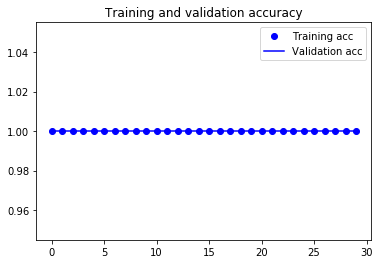

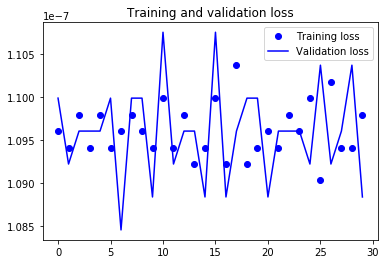

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [0]:
#plot accuracy
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
plt

In [0]:
#make predictions on training images of bats
#now try making predictions on train images
#Put one image into folder test1image
#images need to be in folder within folder test_dir to be found by flow_from_directory
#https://github.com/keras-team/keras/issues/3946
test_dir = "train_bat"
#bat.1 through bat.9 from train set. 
num_test_images = 18

#test_datagen = ImageDataGenerator(
#    rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary', 
shuffle = False)

#y = model_test.predict_generator(test_generator, steps=num_test_images, 
#                       verbose =1)
#version without loading model
y = model.predict_generator(test_generator, steps=num_test_images)
import numpy as np
np.histogram(y)
y

Found 18 images belonging to 1 classes.


array([[4.5510227e-08],
       [4.8404370e-08],
       [5.0917730e-08],
       [4.8909886e-08],
       [5.8919102e-08],
       [7.1409971e-08],
       [4.6768783e-08],
       [6.5903876e-08],
       [5.1591783e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)